Bar id — ID батончика в базе данных
Company (Maker-if known) — название компании, изготовившей батончик.
Specific Bean Origin or Bar Name — точное место происхождения какао-бобов.
Broad Bean Origin — название региона, где были выращены какао-бобы.
Company Location — страна, в которой произведён шоколадный батончик.
Bean Type — вид какао-бобов, используемых в батончике.
REF — числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее ревью.
Review Date — год публикации рецензии.
Cocoa Percent — процент какао в шоколаде.
Rating — оценка батончика фокус-группой.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from statsmodels import stats

In [47]:
df = pd.read_csv('cacao_flavors.csv')
df.tail()

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India
1794,1795,Zotter,"Brazil, Mitzi Blue",486,2010,65%,Austria,3.00,,Brazil


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [5]:
df.describe()

,Bar id,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,898.000000,1035.904735,2012.325348,3.422981
std,518.316184,552.886365,2.927210,1.750584
min,1.000000,5.000000,2006.000000,1.000000
25%,449.500000,576.000000,2010.000000,3.000000
50%,898.000000,1069.000000,2013.000000,3.250000
75%,1346.500000,1502.000000,2015.000000,3.500000
max,1795.000000,1952.000000,2017.000000,19.750000


In [6]:
df.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

In [48]:
df.columns=['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
           'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']
df.head()

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


1795


<AxesSubplot:>

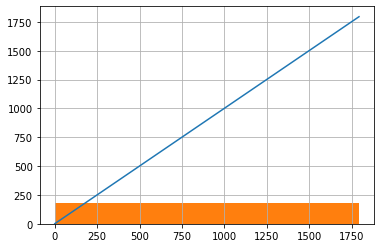

In [49]:
print(df.bar_id.nunique())
plt.plot(df.bar_id)
df.bar_id.hist()

id батончиков все уникальны, упорядочены, задвоениий и пропусков нет, поэтому этот столбец удалим

In [50]:
df.drop(['bar_id'], inplace=True, axis=1)
df.head()

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


# Company

In [16]:
df.company.value_counts()

                                    99
Soma                                45
Fresco                              26
Bonnat                              26
Pralus                              25
                                    ..
Shattell                             1
Cacao Arabuco                        1
Chuao Chocolatier (Pralus)           1
Artisan du Chocolat (Casa Luker)     1
La Pepa de Oro                       1
Name: company, Length: 408, dtype: int64

In [51]:
# заменим пустые строки на None
df.company = df.company.apply(lambda x: None if x.strip()=='' else x)
df.company.value_counts()

Soma                                45
Fresco                              26
Bonnat                              26
Pralus                              25
Domori                              22
                                    ..
Shattell                             1
Cacao Arabuco                        1
Chuao Chocolatier (Pralus)           1
Artisan du Chocolat (Casa Luker)     1
La Pepa de Oro                       1
Name: company, Length: 407, dtype: int64

In [52]:
display(pd.DataFrame(df.company.value_counts()))
print(f"Количество компаний, у которых более 10 оценок: {(df.company.value_counts()>10).sum()}")

,company
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
...,...
Shattell,1
Cacao Arabuco,1
Chuao Chocolatier (Pralus),1
Artisan du Chocolat (Casa Luker),1


Количество компаний, у которых более 10 оценок: 30


# specific_origin

In [32]:
df.specific_origin.value_counts()

                                         58
Madagascar                               55
Peru                                     44
Ecuador                                  39
Dominican Republic                       33
                                         ..
Sylvestre, Oialla                         1
Boyaca, Aprocampa Coop, Pauna             1
Canoabo, Hacienda San Jose                1
Guasare, Zulia Prov., 2015, batch 124     1
Java, Javablond                           1
Name: specific_origin, Length: 1013, dtype: int64

In [53]:
# заменим пустые строки на None
df.specific_origin = df.specific_origin.apply(lambda x: None if x.strip()=='' else x)

In [54]:
display(df.specific_origin.value_counts())
print(f"Количество регионов, встретившихся более 10 раз: {(df.specific_origin.value_counts()>10).sum()}")
(df.specific_origin.value_counts()).sum()

Madagascar                       55
Peru                             44
Ecuador                          39
Dominican Republic               33
Venezuela                        21
                                 ..
Crazy 88                          1
Sylvestre, Oialla                 1
Boyaca, Aprocampa Coop, Pauna     1
Canoabo, Hacienda San Jose        1
Java, Javablond                   1
Name: specific_origin, Length: 1012, dtype: int64

Количество регионов, встретившихся более 10 раз: 15


1737

# ref

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

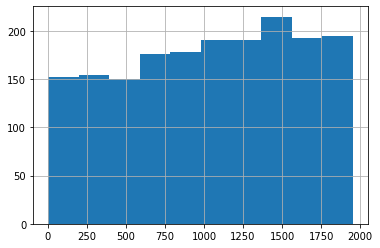

In [55]:
df.ref.hist()
df.ref.describe()